<div align="center">
    <img src="https://www.universidades.com.ec/logos/original/logo-universidad-politecnica-salesiana.png">
    <h1 style="text-align: center;"><span style="text-align: center; color: #0000ff;"><strong>TAREA 5 - Graficos FIFA - PAPERMILL</strong></span></h1>
    <p style="text-align: center;"><span style="text-align: center;"><strong>ESTUDIANTE: ANGEL RUIZ</strong></span></p>
</div>

<h2>
	<span style="color: #00ff00;">
		 Importaci&oacute;n de librerias
	</span>
</h2>
<p>
	<span>
	</span>
	 A continuaci&oacute;n se importaran todas las librer&iacute;as que se utilizaran en el proceso del
	<span class="misspelling correction" data-type="misspelling" data-suggestions="[{&quot;value&quot;:&quot;an&aacute;lisis&quot;},{&quot;value&quot;:&quot;ana lisis&quot;}]" data-rule="MORFOLOGIK_RULE_ES" title="Se ha encontrado un posible error ortogr&aacute;fico." data-word="analisis">
		 an&aacute;lisis
	</span>
	 y simulaci&oacute;n de los datos.
</p>

In [1]:
import pandas as pd
import altair as alt
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)

<h2><span style="color: #00ff00;"> Importaci&oacute;n de datos</span></h2>
<p>Se importa el dataset que se ultizará para obtener todos los datos necesarios</p>

In [2]:
df = pd.read_csv('C:/Users/angel/Downloads/fifa.csv')
df.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


<h2><span style="color: #00ff00;"> Tranformación de datos</span></h2>
<p>Transformamos una columna del dataset para obtener libras y así seguir con lo requerido de la práctica</p>

In [3]:
df['weight_lbs'] = df['weight_kgs']*2.20462
df[['weight_lbs','weight_kgs']].head()

,weight_lbs,weight_kgs
0,158.953102,72.1
1,167.992044,76.2
2,184.967618,83.9
3,130.072580,59.0
4,195.990718,88.9


<h2><span style="color: #00ff00;">Filtración de datos</span></h2>
<p>Obtenemos los valores requeridos para la gráficas</p>

In [4]:
dict_weight = {'weight_lbs':['<125','>=125 and <150','>=150 and <175','>=175'],
               'values':[df.query('weight_lbs <125').count()[0]/len(df),
                         df.query('weight_lbs >=125 and weight_lbs < 150 ').count()[0]/len(df),
                        df.query('weight_lbs >=150 and weight_lbs < 175 ').count()[0]/len(df)
                         ,df.query('weight_lbs >=175').count()[0]/len(df)]}
df_weight=pd.DataFrame(dict_weight)
df_weight

,weight_lbs,values
0,<125,0.002005
1,>=125 and <150,0.163752
2,>=150 and <175,0.558928
3,>=175,0.275315


<h2><span style="color: #00ff00;">Graficamos los datos</span></h2>
<p>Con los valores filtrados procedmos a graficar</p>

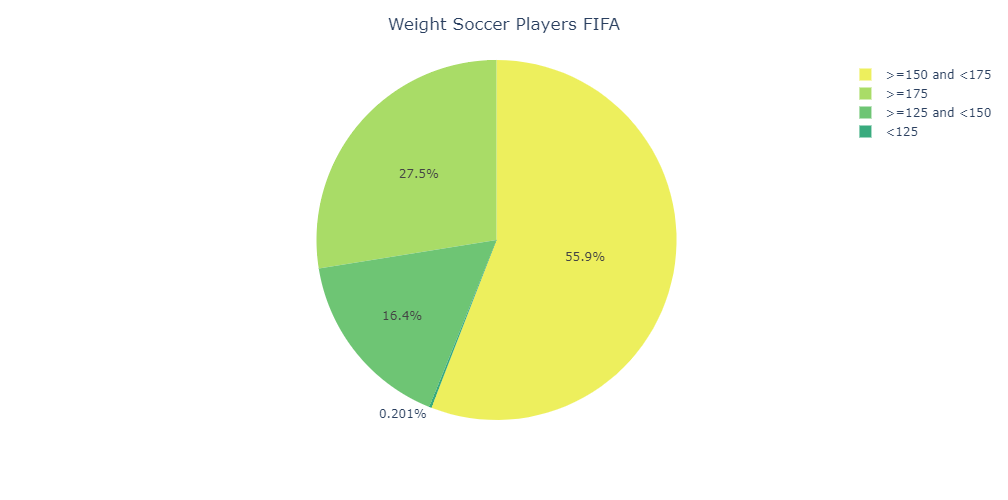

In [5]:
fig = px.pie(df_weight, values="values",
             names="weight_lbs", 
             color_discrete_sequence=px.colors.sequential.Aggrnyl_r,width=500,height=500)
fig.update_layout(title_text='Weight Soccer Players FIFA', title_x=0.5)

<h2><span style="color: #00ff00;">Filtración de datos</span></h2>
<p>De igual manera que lo anterior obtenemos los valores requeridos para la gráficas</p>

In [6]:
df_overall = pd.DataFrame(df.groupby(['overall_rating'])['overall_rating'].count())
df_overall.columns = ['count']
df_overall.reset_index(inplace=True)
df_overall.head()

,overall_rating,count
0,47,21
1,48,33
2,49,45
3,50,98
4,51,120


<h2><span style="color: #00ff00;">Graficamos los datos</span></h2>
<p>Con los valores filtrados procedmos a graficar</p>

In [7]:
alt.Chart(df_overall.melt('overall_rating')).mark_bar().encode(
    x=alt.X('overall_rating',bin=alt.Bin(maxbins=5),title='Overall'),
    y=alt.Y('value',title='count'),
    color=alt.Color('variable',scale=alt.Scale(domain=['count'],range=['green']))
).properties(title='Overall rating').interactive()

alt.Chart(...)

<h2><span style="color: #00ff00;">PaperMill</span></h2>
<br>
<h2><span style="color: #00ff00;"> Parametrizaci&oacute;n</span></h2>
<p>Se utiliza una variable para parametrizar y lograr graficos variables.</p>

In [8]:
titulo = ''

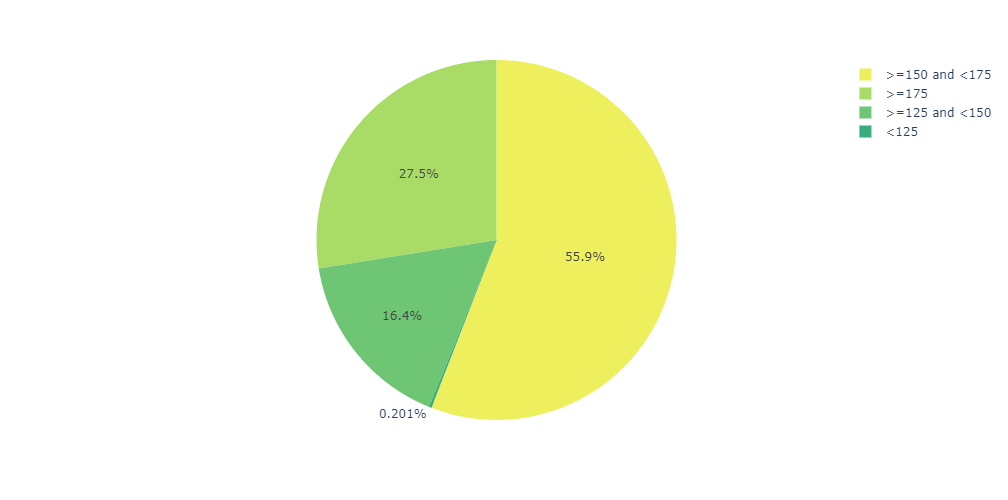

In [9]:
fig = px.pie(df_weight, values="values",
             names="weight_lbs", 
             color_discrete_sequence=px.colors.sequential.Aggrnyl_r,width=500,height=500)
fig.update_layout(title_text=titulo, title_x=0.5)

<h2><span style="color: #00ff00;">Conclusión</span></h2>
<p>La elección correcta de los colores para los gráficos es un paso fundamental para el entendimiento de los mismos, para ellos hay que tener en cuenta el contexto en el cual nos estamos desenvolviendo para elegir lo que mejor se adapte, por otro parte un gráfico debe adaptarse a nuestros datos para una mejor visualización.
<br>

La parametrización de los datos en un cuaderno de jupyter nos ahorra mucho tiempo para el análisis de datos, ya que podemos filtrar y graficar sin cambiar el código fuente, simplemente pasando los parámetros que requerimos</p>